# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
#data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"

data_dir = "/input"

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

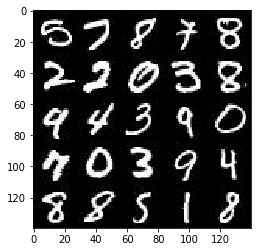

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

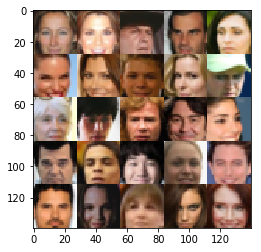

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))


## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [31]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.1
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [80]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function 

    real_inputs = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels),
                                'real_inputs')
    z_inputs = tf.placeholder(tf.float32, (None, z_dim), 'z_inputs')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate' ,shape=())

    return real_inputs, z_inputs, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [70]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
    
        
        alpha = 0.2
        
        h1 = tf.layers.conv2d(images, 64, 5, 2, 'same')
        h1 = tf.maximum(alpha * h1, h1)
        
        h2 = tf.layers.conv2d(h1, 128, 5, 2, 'same')
        h2 = tf.layers.batch_normalization(h2, training=True)
        h2 = tf.maximum(alpha * h2, h2)
        
        h3 = tf.layers.conv2d(h2, 256, 5, 2, 'same')
        h3 = tf.layers.batch_normalization(h3, training=True)
        h3 = tf.maximum(alpha * h3, h3)
        
        flat = tf.reshape(h3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

tests.test_discriminator(discriminator, tf)
    


Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [74]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function

    with tf.variable_scope('generator', reuse=not is_train):
        alpha = 0.2
    
        h1 = tf.layers.dense(z, 2*2*512)
        h1 = tf.reshape(h1, (-1, 2, 2, 512))
        h1 = tf.layers.batch_normalization(h1, training=is_train)
        h1 = tf.maximum(alpha * h1, h1)
    
        h2 = tf.layers.conv2d_transpose(h1, 256, 5, 2, 'valid')
        h2 = tf.layers.batch_normalization(h2, training=is_train)
        h2 = tf.maximum(alpha * h2, h2)
    
        h3 = tf.layers.conv2d_transpose(h2, 128, 5, 2, 'same')
        h3 = tf.layers.batch_normalization(h3, training=is_train)
        h3 = tf.maximum(alpha * h3, h3)
    
        logits = tf.layers.conv2d_transpose(h3, out_channel_dim, 5, 2, 'same')
        out = tf.tanh(logits)
    
        return out 

    
    
    #return None


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [71]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [72]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    d_train_opt = tf.train.AdamOptimizer(
        learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    
    ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    g_updates = [opt for opt in ops if opt.name.startswith('generator')]
    with tf.control_dependencies(g_updates):
        g_train_opt = tf.train.AdamOptimizer(
            learning_rate, beta1).minimize(g_loss, var_list=g_vars)
        
    return d_train_opt, g_train_opt
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [81]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [82]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, img_width, img_height, img_channels = data_shape
    
    real_input, z_input, lr = model_inputs(
        img_width, img_height, img_channels, z_dim)
    
    d_loss, g_loss = model_loss(real_input, z_input, img_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    print_every = 10
    show_every = 100
    losses = []
    n_images = 25
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2.0
                z_sample = np.random.uniform(-1, 1, (batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={
                        real_input: batch_images, z_input: z_sample, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={
                        z_input: z_sample, lr: learning_rate})
                
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({z_input: z_sample, real_input: batch_images})
                    train_loss_g = g_loss.eval({z_input: z_sample})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    losses.append((train_loss_d, train_loss_g))
                
                if steps % show_every == 0:
                    show_generator_output(sess, n_images, z_input, img_channels, data_image_mode)


 

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.9104... Generator Loss: 13.2339
Epoch 1/2... Discriminator Loss: 0.1790... Generator Loss: 7.8842
Epoch 1/2... Discriminator Loss: 0.4436... Generator Loss: 3.0261
Epoch 1/2... Discriminator Loss: 1.3364... Generator Loss: 1.2544
Epoch 1/2... Discriminator Loss: 0.3721... Generator Loss: 2.1120
Epoch 1/2... Discriminator Loss: 0.2266... Generator Loss: 4.1961
Epoch 1/2... Discriminator Loss: 0.3968... Generator Loss: 6.8821
Epoch 1/2... Discriminator Loss: 0.3094... Generator Loss: 1.7901
Epoch 1/2... Discriminator Loss: 0.1975... Generator Loss: 1.9337
Epoch 1/2... Discriminator Loss: 0.0582... Generator Loss: 3.2818


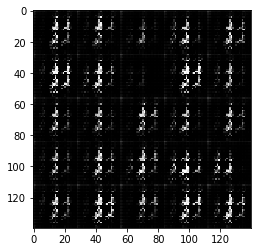

Epoch 1/2... Discriminator Loss: 0.0425... Generator Loss: 14.0727
Epoch 1/2... Discriminator Loss: 0.6295... Generator Loss: 1.3864
Epoch 1/2... Discriminator Loss: 0.2311... Generator Loss: 2.1475
Epoch 1/2... Discriminator Loss: 0.1154... Generator Loss: 3.7511
Epoch 1/2... Discriminator Loss: 0.1596... Generator Loss: 2.3235
Epoch 1/2... Discriminator Loss: 0.3738... Generator Loss: 2.7751
Epoch 1/2... Discriminator Loss: 0.2022... Generator Loss: 3.0607
Epoch 1/2... Discriminator Loss: 0.2080... Generator Loss: 3.6950
Epoch 1/2... Discriminator Loss: 0.3180... Generator Loss: 2.9028
Epoch 1/2... Discriminator Loss: 0.2749... Generator Loss: 2.2255


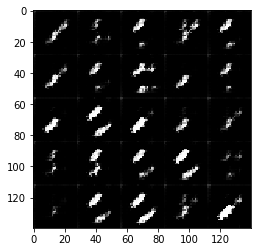

Epoch 1/2... Discriminator Loss: 0.3697... Generator Loss: 1.9029
Epoch 1/2... Discriminator Loss: 0.3547... Generator Loss: 2.4060
Epoch 1/2... Discriminator Loss: 0.4407... Generator Loss: 1.3807
Epoch 1/2... Discriminator Loss: 0.8050... Generator Loss: 1.0898
Epoch 1/2... Discriminator Loss: 0.2809... Generator Loss: 3.3832
Epoch 1/2... Discriminator Loss: 0.6472... Generator Loss: 3.2004
Epoch 1/2... Discriminator Loss: 0.7043... Generator Loss: 4.6767
Epoch 1/2... Discriminator Loss: 0.1603... Generator Loss: 2.9020
Epoch 1/2... Discriminator Loss: 1.2797... Generator Loss: 0.7349
Epoch 1/2... Discriminator Loss: 0.6160... Generator Loss: 1.3023


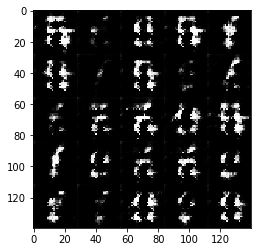

Epoch 1/2... Discriminator Loss: 0.1983... Generator Loss: 2.9434
Epoch 1/2... Discriminator Loss: 0.3104... Generator Loss: 2.7587
Epoch 1/2... Discriminator Loss: 0.6340... Generator Loss: 1.6483
Epoch 1/2... Discriminator Loss: 0.3821... Generator Loss: 2.0301
Epoch 1/2... Discriminator Loss: 0.5093... Generator Loss: 1.8868
Epoch 1/2... Discriminator Loss: 0.5463... Generator Loss: 2.1361
Epoch 1/2... Discriminator Loss: 0.3510... Generator Loss: 2.7512
Epoch 1/2... Discriminator Loss: 0.4989... Generator Loss: 1.6115
Epoch 1/2... Discriminator Loss: 0.8198... Generator Loss: 1.4576
Epoch 1/2... Discriminator Loss: 0.5779... Generator Loss: 2.5396


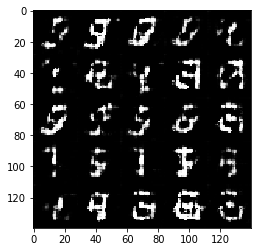

Epoch 1/2... Discriminator Loss: 0.8418... Generator Loss: 1.1200
Epoch 1/2... Discriminator Loss: 0.5025... Generator Loss: 1.9758
Epoch 1/2... Discriminator Loss: 0.4147... Generator Loss: 2.9726
Epoch 1/2... Discriminator Loss: 0.5986... Generator Loss: 1.2703
Epoch 1/2... Discriminator Loss: 0.5366... Generator Loss: 1.4614
Epoch 1/2... Discriminator Loss: 0.5755... Generator Loss: 1.4697
Epoch 1/2... Discriminator Loss: 0.6671... Generator Loss: 1.7025
Epoch 1/2... Discriminator Loss: 0.3968... Generator Loss: 2.0807
Epoch 1/2... Discriminator Loss: 0.8557... Generator Loss: 0.8266
Epoch 1/2... Discriminator Loss: 0.7516... Generator Loss: 1.1452


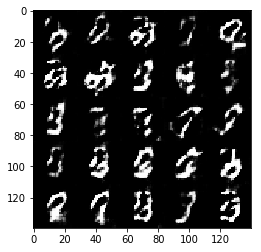

Epoch 1/2... Discriminator Loss: 0.7550... Generator Loss: 1.3492
Epoch 1/2... Discriminator Loss: 0.3882... Generator Loss: 1.7280
Epoch 1/2... Discriminator Loss: 0.6687... Generator Loss: 1.7998
Epoch 1/2... Discriminator Loss: 0.6993... Generator Loss: 2.0698
Epoch 1/2... Discriminator Loss: 0.5813... Generator Loss: 2.3937
Epoch 1/2... Discriminator Loss: 0.6871... Generator Loss: 1.9577
Epoch 1/2... Discriminator Loss: 0.5958... Generator Loss: 1.3887
Epoch 1/2... Discriminator Loss: 1.0138... Generator Loss: 0.7340
Epoch 1/2... Discriminator Loss: 0.6143... Generator Loss: 1.5819
Epoch 1/2... Discriminator Loss: 0.9951... Generator Loss: 0.8697


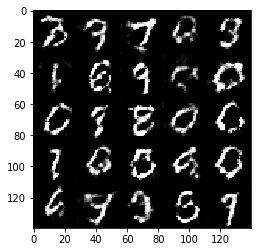

Epoch 1/2... Discriminator Loss: 0.8633... Generator Loss: 1.8788
Epoch 1/2... Discriminator Loss: 0.7233... Generator Loss: 1.3938
Epoch 1/2... Discriminator Loss: 0.5606... Generator Loss: 1.5885
Epoch 1/2... Discriminator Loss: 0.9773... Generator Loss: 0.8624
Epoch 1/2... Discriminator Loss: 0.7119... Generator Loss: 1.7993
Epoch 1/2... Discriminator Loss: 0.8790... Generator Loss: 2.4732
Epoch 1/2... Discriminator Loss: 0.9141... Generator Loss: 1.0669
Epoch 1/2... Discriminator Loss: 0.6889... Generator Loss: 2.0905
Epoch 1/2... Discriminator Loss: 0.7538... Generator Loss: 2.0819
Epoch 1/2... Discriminator Loss: 0.8556... Generator Loss: 0.8928


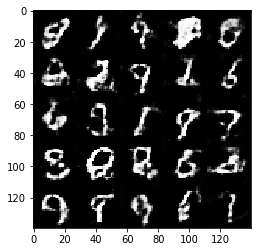

Epoch 1/2... Discriminator Loss: 0.7505... Generator Loss: 1.1299
Epoch 1/2... Discriminator Loss: 0.8307... Generator Loss: 1.6912
Epoch 1/2... Discriminator Loss: 1.2760... Generator Loss: 0.5461
Epoch 1/2... Discriminator Loss: 1.5581... Generator Loss: 4.1409
Epoch 1/2... Discriminator Loss: 0.7261... Generator Loss: 2.0362
Epoch 1/2... Discriminator Loss: 0.6256... Generator Loss: 1.3642
Epoch 1/2... Discriminator Loss: 0.7140... Generator Loss: 1.0467
Epoch 1/2... Discriminator Loss: 1.1345... Generator Loss: 2.6001
Epoch 1/2... Discriminator Loss: 0.5308... Generator Loss: 1.5754
Epoch 1/2... Discriminator Loss: 0.7377... Generator Loss: 2.2462


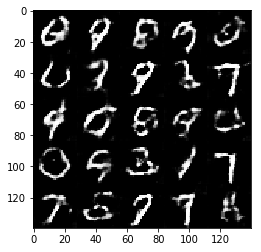

Epoch 1/2... Discriminator Loss: 1.2013... Generator Loss: 0.6094
Epoch 1/2... Discriminator Loss: 0.9214... Generator Loss: 1.3249
Epoch 1/2... Discriminator Loss: 0.6342... Generator Loss: 1.9023
Epoch 1/2... Discriminator Loss: 1.3133... Generator Loss: 0.5066
Epoch 1/2... Discriminator Loss: 0.6450... Generator Loss: 1.7935
Epoch 1/2... Discriminator Loss: 0.9940... Generator Loss: 2.9549
Epoch 1/2... Discriminator Loss: 0.6830... Generator Loss: 2.0615
Epoch 1/2... Discriminator Loss: 0.7822... Generator Loss: 1.1059
Epoch 1/2... Discriminator Loss: 1.0122... Generator Loss: 2.3762
Epoch 1/2... Discriminator Loss: 0.9789... Generator Loss: 1.0281


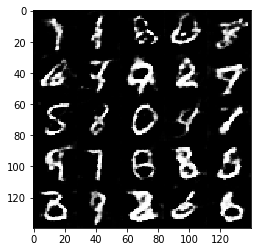

Epoch 1/2... Discriminator Loss: 0.7166... Generator Loss: 1.7012
Epoch 1/2... Discriminator Loss: 0.9051... Generator Loss: 1.8197
Epoch 1/2... Discriminator Loss: 1.2403... Generator Loss: 0.5703
Epoch 2/2... Discriminator Loss: 0.6362... Generator Loss: 1.2558
Epoch 2/2... Discriminator Loss: 1.0224... Generator Loss: 0.6250
Epoch 2/2... Discriminator Loss: 1.1190... Generator Loss: 0.6700
Epoch 2/2... Discriminator Loss: 0.9254... Generator Loss: 0.8857
Epoch 2/2... Discriminator Loss: 1.3376... Generator Loss: 0.4664
Epoch 2/2... Discriminator Loss: 0.7010... Generator Loss: 2.1684
Epoch 2/2... Discriminator Loss: 1.0173... Generator Loss: 2.6709


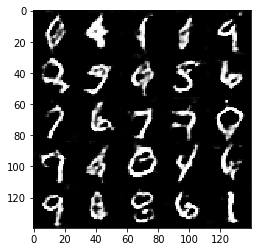

Epoch 2/2... Discriminator Loss: 1.0413... Generator Loss: 0.6759
Epoch 2/2... Discriminator Loss: 0.9821... Generator Loss: 0.7946
Epoch 2/2... Discriminator Loss: 1.5726... Generator Loss: 0.3726
Epoch 2/2... Discriminator Loss: 0.7908... Generator Loss: 1.4073
Epoch 2/2... Discriminator Loss: 0.9047... Generator Loss: 1.6506
Epoch 2/2... Discriminator Loss: 0.8750... Generator Loss: 1.3741
Epoch 2/2... Discriminator Loss: 0.7311... Generator Loss: 1.0448
Epoch 2/2... Discriminator Loss: 0.7779... Generator Loss: 1.0501
Epoch 2/2... Discriminator Loss: 1.0941... Generator Loss: 0.6743
Epoch 2/2... Discriminator Loss: 1.2123... Generator Loss: 0.5235


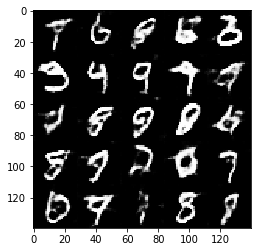

Epoch 2/2... Discriminator Loss: 0.8417... Generator Loss: 1.1364
Epoch 2/2... Discriminator Loss: 1.6000... Generator Loss: 0.3509
Epoch 2/2... Discriminator Loss: 0.8580... Generator Loss: 1.4137
Epoch 2/2... Discriminator Loss: 0.6608... Generator Loss: 1.8614
Epoch 2/2... Discriminator Loss: 0.9551... Generator Loss: 0.7029
Epoch 2/2... Discriminator Loss: 0.6813... Generator Loss: 1.8275
Epoch 2/2... Discriminator Loss: 1.0458... Generator Loss: 0.6569
Epoch 2/2... Discriminator Loss: 1.3091... Generator Loss: 0.4660
Epoch 2/2... Discriminator Loss: 0.7406... Generator Loss: 1.4884
Epoch 2/2... Discriminator Loss: 3.3160... Generator Loss: 4.3495


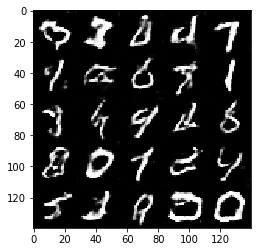

Epoch 2/2... Discriminator Loss: 1.0509... Generator Loss: 0.7481
Epoch 2/2... Discriminator Loss: 0.8742... Generator Loss: 0.9252
Epoch 2/2... Discriminator Loss: 0.9351... Generator Loss: 2.0128
Epoch 2/2... Discriminator Loss: 0.6527... Generator Loss: 1.1226
Epoch 2/2... Discriminator Loss: 1.0386... Generator Loss: 0.6346
Epoch 2/2... Discriminator Loss: 1.1559... Generator Loss: 0.5111
Epoch 2/2... Discriminator Loss: 1.0455... Generator Loss: 2.4187
Epoch 2/2... Discriminator Loss: 0.8372... Generator Loss: 0.9075
Epoch 2/2... Discriminator Loss: 1.1399... Generator Loss: 0.5285
Epoch 2/2... Discriminator Loss: 0.7361... Generator Loss: 1.1234


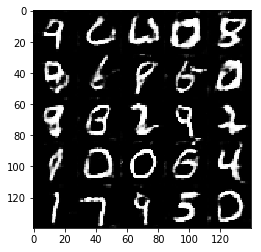

Epoch 2/2... Discriminator Loss: 0.9016... Generator Loss: 0.8344
Epoch 2/2... Discriminator Loss: 0.8959... Generator Loss: 0.7595
Epoch 2/2... Discriminator Loss: 1.5227... Generator Loss: 1.7964
Epoch 2/2... Discriminator Loss: 0.7532... Generator Loss: 1.4884
Epoch 2/2... Discriminator Loss: 0.9548... Generator Loss: 0.8315
Epoch 2/2... Discriminator Loss: 0.7448... Generator Loss: 1.2204
Epoch 2/2... Discriminator Loss: 1.1577... Generator Loss: 1.7995
Epoch 2/2... Discriminator Loss: 0.8907... Generator Loss: 0.7663
Epoch 2/2... Discriminator Loss: 0.6287... Generator Loss: 1.3092
Epoch 2/2... Discriminator Loss: 0.8341... Generator Loss: 0.8836


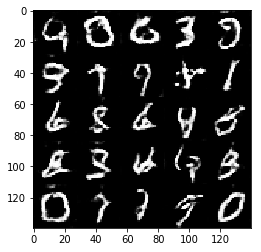

Epoch 2/2... Discriminator Loss: 1.4602... Generator Loss: 0.3641
Epoch 2/2... Discriminator Loss: 1.2157... Generator Loss: 0.5456
Epoch 2/2... Discriminator Loss: 2.4306... Generator Loss: 0.1213
Epoch 2/2... Discriminator Loss: 0.8481... Generator Loss: 0.8793
Epoch 2/2... Discriminator Loss: 0.9903... Generator Loss: 0.6854
Epoch 2/2... Discriminator Loss: 2.0046... Generator Loss: 3.9213
Epoch 2/2... Discriminator Loss: 0.7211... Generator Loss: 1.0865
Epoch 2/2... Discriminator Loss: 0.9994... Generator Loss: 0.6403
Epoch 2/2... Discriminator Loss: 1.6957... Generator Loss: 0.2926
Epoch 2/2... Discriminator Loss: 0.7907... Generator Loss: 0.8914


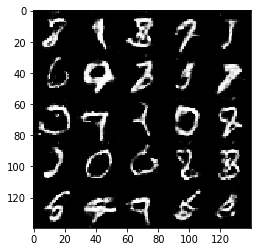

Epoch 2/2... Discriminator Loss: 0.6967... Generator Loss: 1.2190
Epoch 2/2... Discriminator Loss: 2.2182... Generator Loss: 0.1666
Epoch 2/2... Discriminator Loss: 0.6218... Generator Loss: 1.6321
Epoch 2/2... Discriminator Loss: 2.0006... Generator Loss: 0.2430
Epoch 2/2... Discriminator Loss: 0.9773... Generator Loss: 0.7628
Epoch 2/2... Discriminator Loss: 1.0852... Generator Loss: 0.5814
Epoch 2/2... Discriminator Loss: 0.7377... Generator Loss: 1.0875
Epoch 2/2... Discriminator Loss: 0.8728... Generator Loss: 0.8755
Epoch 2/2... Discriminator Loss: 2.4123... Generator Loss: 0.1510
Epoch 2/2... Discriminator Loss: 1.1676... Generator Loss: 0.6005


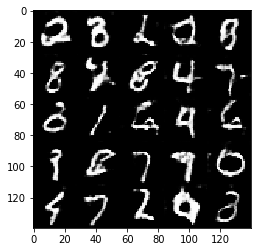

Epoch 2/2... Discriminator Loss: 1.2259... Generator Loss: 3.0873
Epoch 2/2... Discriminator Loss: 1.0281... Generator Loss: 0.6406
Epoch 2/2... Discriminator Loss: 1.7049... Generator Loss: 0.2781
Epoch 2/2... Discriminator Loss: 0.6908... Generator Loss: 1.6078
Epoch 2/2... Discriminator Loss: 0.8068... Generator Loss: 1.0414
Epoch 2/2... Discriminator Loss: 0.9313... Generator Loss: 0.7138
Epoch 2/2... Discriminator Loss: 0.5346... Generator Loss: 1.9988
Epoch 2/2... Discriminator Loss: 1.2730... Generator Loss: 1.2906
Epoch 2/2... Discriminator Loss: 1.0420... Generator Loss: 0.8299
Epoch 2/2... Discriminator Loss: 0.9022... Generator Loss: 1.2137


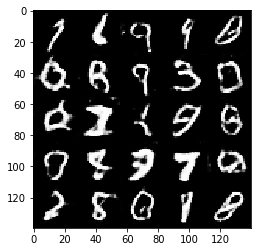

Epoch 2/2... Discriminator Loss: 0.9376... Generator Loss: 0.7166
Epoch 2/2... Discriminator Loss: 0.9754... Generator Loss: 0.7993
Epoch 2/2... Discriminator Loss: 1.4666... Generator Loss: 0.3851
Epoch 2/2... Discriminator Loss: 1.0156... Generator Loss: 0.8099
Epoch 2/2... Discriminator Loss: 1.3867... Generator Loss: 2.6405
Epoch 2/2... Discriminator Loss: 0.8473... Generator Loss: 1.9141
Epoch 2/2... Discriminator Loss: 1.0307... Generator Loss: 0.7602
Epoch 2/2... Discriminator Loss: 1.1964... Generator Loss: 0.5590
Epoch 2/2... Discriminator Loss: 0.6592... Generator Loss: 1.0489
Epoch 2/2... Discriminator Loss: 0.7115... Generator Loss: 1.7078


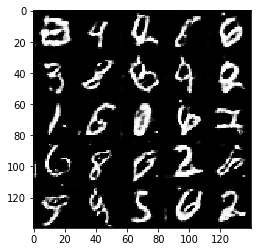

Epoch 2/2... Discriminator Loss: 0.5853... Generator Loss: 1.2860
Epoch 2/2... Discriminator Loss: 0.8479... Generator Loss: 0.8820
Epoch 2/2... Discriminator Loss: 0.5297... Generator Loss: 1.7201
Epoch 2/2... Discriminator Loss: 0.6505... Generator Loss: 1.2873
Epoch 2/2... Discriminator Loss: 0.6456... Generator Loss: 1.1704
Epoch 2/2... Discriminator Loss: 1.0868... Generator Loss: 0.6149
Epoch 2/2... Discriminator Loss: 1.0739... Generator Loss: 0.5915


In [83]:
batch_size = 64
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.1720... Generator Loss: 0.4221
Epoch 1/1... Discriminator Loss: 0.5204... Generator Loss: 1.2428
Epoch 1/1... Discriminator Loss: 0.0845... Generator Loss: 16.2962
Epoch 1/1... Discriminator Loss: 0.0279... Generator Loss: 4.7177
Epoch 1/1... Discriminator Loss: 0.1391... Generator Loss: 4.3059
Epoch 1/1... Discriminator Loss: 0.5413... Generator Loss: 2.7572
Epoch 1/1... Discriminator Loss: 0.7828... Generator Loss: 2.6392
Epoch 1/1... Discriminator Loss: 0.5019... Generator Loss: 1.7808
Epoch 1/1... Discriminator Loss: 0.1732... Generator Loss: 2.6279
Epoch 1/1... Discriminator Loss: 0.3938... Generator Loss: 1.8516


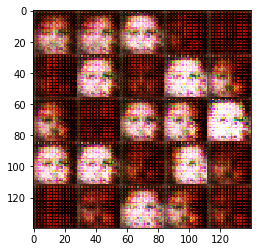

Epoch 1/1... Discriminator Loss: 0.2256... Generator Loss: 4.1195
Epoch 1/1... Discriminator Loss: 0.2189... Generator Loss: 3.9215
Epoch 1/1... Discriminator Loss: 0.9654... Generator Loss: 4.6069
Epoch 1/1... Discriminator Loss: 0.3883... Generator Loss: 1.8959
Epoch 1/1... Discriminator Loss: 2.5158... Generator Loss: 0.1392
Epoch 1/1... Discriminator Loss: 0.4371... Generator Loss: 2.5742
Epoch 1/1... Discriminator Loss: 1.6798... Generator Loss: 0.4422
Epoch 1/1... Discriminator Loss: 1.1775... Generator Loss: 1.2562
Epoch 1/1... Discriminator Loss: 3.9985... Generator Loss: 5.7817
Epoch 1/1... Discriminator Loss: 1.8481... Generator Loss: 0.3525


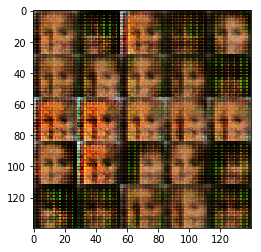

Epoch 1/1... Discriminator Loss: 0.9862... Generator Loss: 2.7718
Epoch 1/1... Discriminator Loss: 0.3252... Generator Loss: 1.9204
Epoch 1/1... Discriminator Loss: 0.9144... Generator Loss: 0.8986
Epoch 1/1... Discriminator Loss: 0.8311... Generator Loss: 1.7338
Epoch 1/1... Discriminator Loss: 0.9972... Generator Loss: 1.1477
Epoch 1/1... Discriminator Loss: 0.8620... Generator Loss: 1.2490
Epoch 1/1... Discriminator Loss: 0.9795... Generator Loss: 1.3949
Epoch 1/1... Discriminator Loss: 0.7993... Generator Loss: 1.1398
Epoch 1/1... Discriminator Loss: 0.8595... Generator Loss: 0.8055
Epoch 1/1... Discriminator Loss: 1.4527... Generator Loss: 0.5432


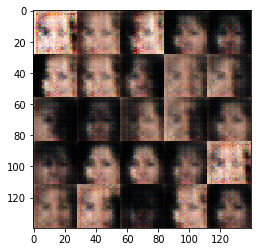

Epoch 1/1... Discriminator Loss: 0.4595... Generator Loss: 2.3372
Epoch 1/1... Discriminator Loss: 0.7128... Generator Loss: 1.2426
Epoch 1/1... Discriminator Loss: 1.0023... Generator Loss: 0.9566
Epoch 1/1... Discriminator Loss: 1.4636... Generator Loss: 2.1887
Epoch 1/1... Discriminator Loss: 0.8743... Generator Loss: 1.6900
Epoch 1/1... Discriminator Loss: 0.9122... Generator Loss: 1.0423
Epoch 1/1... Discriminator Loss: 0.9638... Generator Loss: 1.3511
Epoch 1/1... Discriminator Loss: 1.0859... Generator Loss: 0.8953
Epoch 1/1... Discriminator Loss: 1.0187... Generator Loss: 0.8375
Epoch 1/1... Discriminator Loss: 0.9305... Generator Loss: 0.8917


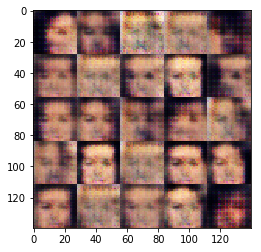

Epoch 1/1... Discriminator Loss: 0.5457... Generator Loss: 2.0256
Epoch 1/1... Discriminator Loss: 1.0448... Generator Loss: 1.1803
Epoch 1/1... Discriminator Loss: 1.0233... Generator Loss: 1.0553
Epoch 1/1... Discriminator Loss: 1.1500... Generator Loss: 3.5425
Epoch 1/1... Discriminator Loss: 1.0322... Generator Loss: 0.7782
Epoch 1/1... Discriminator Loss: 1.5400... Generator Loss: 0.3825
Epoch 1/1... Discriminator Loss: 0.8420... Generator Loss: 0.9409
Epoch 1/1... Discriminator Loss: 0.8755... Generator Loss: 2.3816
Epoch 1/1... Discriminator Loss: 1.4512... Generator Loss: 2.6649
Epoch 1/1... Discriminator Loss: 0.3812... Generator Loss: 1.7071


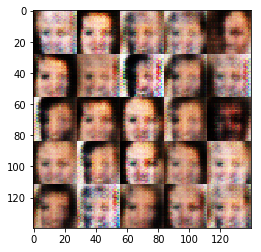

Epoch 1/1... Discriminator Loss: 0.6633... Generator Loss: 1.0448
Epoch 1/1... Discriminator Loss: 0.9667... Generator Loss: 0.7235
Epoch 1/1... Discriminator Loss: 1.1140... Generator Loss: 0.5532
Epoch 1/1... Discriminator Loss: 2.0897... Generator Loss: 0.1940
Epoch 1/1... Discriminator Loss: 1.4898... Generator Loss: 0.3645
Epoch 1/1... Discriminator Loss: 1.3507... Generator Loss: 0.4444
Epoch 1/1... Discriminator Loss: 0.2630... Generator Loss: 3.2231
Epoch 1/1... Discriminator Loss: 0.5539... Generator Loss: 1.8676
Epoch 1/1... Discriminator Loss: 1.1253... Generator Loss: 0.4925
Epoch 1/1... Discriminator Loss: 0.2437... Generator Loss: 1.7793


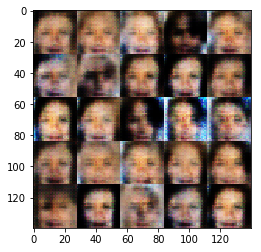

Epoch 1/1... Discriminator Loss: 0.6874... Generator Loss: 1.1891
Epoch 1/1... Discriminator Loss: 0.4216... Generator Loss: 1.8328
Epoch 1/1... Discriminator Loss: 0.3983... Generator Loss: 2.1224
Epoch 1/1... Discriminator Loss: 1.9819... Generator Loss: 0.2830
Epoch 1/1... Discriminator Loss: 0.7055... Generator Loss: 1.0067
Epoch 1/1... Discriminator Loss: 0.7480... Generator Loss: 1.0426
Epoch 1/1... Discriminator Loss: 0.7812... Generator Loss: 0.8445
Epoch 1/1... Discriminator Loss: 0.5428... Generator Loss: 2.8992
Epoch 1/1... Discriminator Loss: 0.4887... Generator Loss: 1.2542
Epoch 1/1... Discriminator Loss: 0.7360... Generator Loss: 1.1712


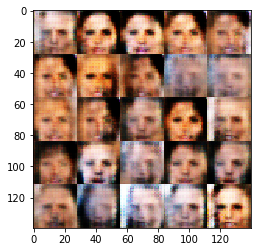

Epoch 1/1... Discriminator Loss: 1.3954... Generator Loss: 0.3530
Epoch 1/1... Discriminator Loss: 0.5220... Generator Loss: 2.8655
Epoch 1/1... Discriminator Loss: 0.7568... Generator Loss: 1.0555
Epoch 1/1... Discriminator Loss: 1.7371... Generator Loss: 0.3235
Epoch 1/1... Discriminator Loss: 1.2963... Generator Loss: 0.4503
Epoch 1/1... Discriminator Loss: 1.8775... Generator Loss: 0.2374
Epoch 1/1... Discriminator Loss: 0.8248... Generator Loss: 1.1728
Epoch 1/1... Discriminator Loss: 0.5793... Generator Loss: 1.6198
Epoch 1/1... Discriminator Loss: 0.9631... Generator Loss: 0.7888
Epoch 1/1... Discriminator Loss: 0.8458... Generator Loss: 2.6829


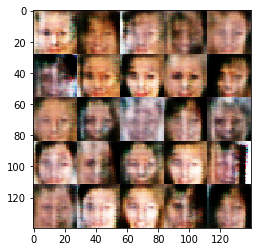

Epoch 1/1... Discriminator Loss: 0.5584... Generator Loss: 1.4012
Epoch 1/1... Discriminator Loss: 1.0097... Generator Loss: 0.7879
Epoch 1/1... Discriminator Loss: 0.7967... Generator Loss: 1.0555
Epoch 1/1... Discriminator Loss: 0.8351... Generator Loss: 1.4432
Epoch 1/1... Discriminator Loss: 1.3512... Generator Loss: 2.3386
Epoch 1/1... Discriminator Loss: 1.4292... Generator Loss: 3.1188
Epoch 1/1... Discriminator Loss: 0.9765... Generator Loss: 0.8566
Epoch 1/1... Discriminator Loss: 1.0148... Generator Loss: 1.9019
Epoch 1/1... Discriminator Loss: 0.6066... Generator Loss: 1.3726
Epoch 1/1... Discriminator Loss: 1.4351... Generator Loss: 0.4293


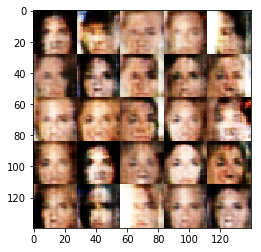

Epoch 1/1... Discriminator Loss: 0.6333... Generator Loss: 1.5435
Epoch 1/1... Discriminator Loss: 1.0199... Generator Loss: 0.8533
Epoch 1/1... Discriminator Loss: 1.4909... Generator Loss: 0.5163
Epoch 1/1... Discriminator Loss: 0.9931... Generator Loss: 0.7801
Epoch 1/1... Discriminator Loss: 0.5234... Generator Loss: 1.9714
Epoch 1/1... Discriminator Loss: 0.9188... Generator Loss: 0.9067
Epoch 1/1... Discriminator Loss: 0.7318... Generator Loss: 2.0002
Epoch 1/1... Discriminator Loss: 0.4803... Generator Loss: 2.0784
Epoch 1/1... Discriminator Loss: 0.8725... Generator Loss: 1.7707
Epoch 1/1... Discriminator Loss: 1.3512... Generator Loss: 0.4817


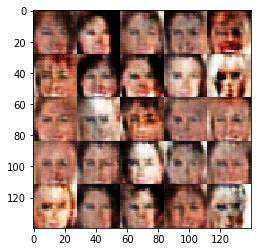

Epoch 1/1... Discriminator Loss: 0.9646... Generator Loss: 0.9088
Epoch 1/1... Discriminator Loss: 1.0230... Generator Loss: 0.7462
Epoch 1/1... Discriminator Loss: 1.0522... Generator Loss: 0.7254
Epoch 1/1... Discriminator Loss: 1.0413... Generator Loss: 0.7323
Epoch 1/1... Discriminator Loss: 0.8875... Generator Loss: 2.0662
Epoch 1/1... Discriminator Loss: 1.0148... Generator Loss: 0.7140
Epoch 1/1... Discriminator Loss: 0.8359... Generator Loss: 0.9611
Epoch 1/1... Discriminator Loss: 0.9496... Generator Loss: 0.7334
Epoch 1/1... Discriminator Loss: 1.3387... Generator Loss: 0.5545
Epoch 1/1... Discriminator Loss: 0.7242... Generator Loss: 1.2992


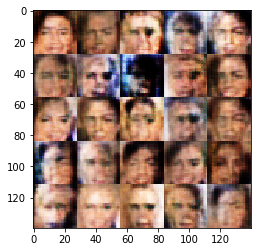

Epoch 1/1... Discriminator Loss: 0.9492... Generator Loss: 0.7313
Epoch 1/1... Discriminator Loss: 0.9088... Generator Loss: 0.8073
Epoch 1/1... Discriminator Loss: 0.7722... Generator Loss: 1.0819
Epoch 1/1... Discriminator Loss: 1.2313... Generator Loss: 0.5251
Epoch 1/1... Discriminator Loss: 0.5257... Generator Loss: 1.8417
Epoch 1/1... Discriminator Loss: 2.5147... Generator Loss: 3.3297
Epoch 1/1... Discriminator Loss: 0.6038... Generator Loss: 1.6222
Epoch 1/1... Discriminator Loss: 0.6531... Generator Loss: 1.6484
Epoch 1/1... Discriminator Loss: 0.6302... Generator Loss: 1.4123
Epoch 1/1... Discriminator Loss: 1.0278... Generator Loss: 0.7017


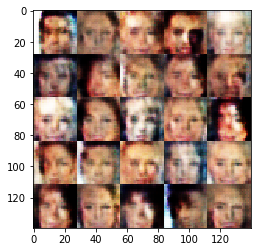

Epoch 1/1... Discriminator Loss: 0.9340... Generator Loss: 0.7137
Epoch 1/1... Discriminator Loss: 1.0615... Generator Loss: 0.7069
Epoch 1/1... Discriminator Loss: 1.2573... Generator Loss: 0.5129
Epoch 1/1... Discriminator Loss: 0.7352... Generator Loss: 1.1349
Epoch 1/1... Discriminator Loss: 0.6990... Generator Loss: 1.3888
Epoch 1/1... Discriminator Loss: 1.3901... Generator Loss: 2.8462
Epoch 1/1... Discriminator Loss: 0.8887... Generator Loss: 1.3433
Epoch 1/1... Discriminator Loss: 0.9019... Generator Loss: 0.9589
Epoch 1/1... Discriminator Loss: 0.8359... Generator Loss: 1.7756
Epoch 1/1... Discriminator Loss: 0.7151... Generator Loss: 1.0758


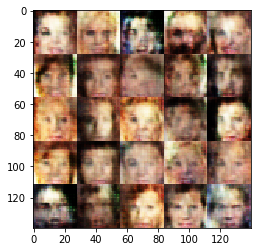

Epoch 1/1... Discriminator Loss: 0.9919... Generator Loss: 0.7989
Epoch 1/1... Discriminator Loss: 1.9364... Generator Loss: 0.3205
Epoch 1/1... Discriminator Loss: 0.7816... Generator Loss: 1.3509
Epoch 1/1... Discriminator Loss: 0.9001... Generator Loss: 1.0618
Epoch 1/1... Discriminator Loss: 0.7373... Generator Loss: 2.0784
Epoch 1/1... Discriminator Loss: 0.6456... Generator Loss: 1.4363
Epoch 1/1... Discriminator Loss: 0.6429... Generator Loss: 1.7661
Epoch 1/1... Discriminator Loss: 1.0029... Generator Loss: 3.6503
Epoch 1/1... Discriminator Loss: 1.1394... Generator Loss: 0.6455
Epoch 1/1... Discriminator Loss: 0.7724... Generator Loss: 0.9895


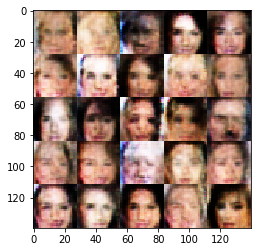

Epoch 1/1... Discriminator Loss: 0.8627... Generator Loss: 1.6328
Epoch 1/1... Discriminator Loss: 0.8000... Generator Loss: 0.9678
Epoch 1/1... Discriminator Loss: 0.9586... Generator Loss: 0.7275
Epoch 1/1... Discriminator Loss: 0.7698... Generator Loss: 1.8123
Epoch 1/1... Discriminator Loss: 0.7922... Generator Loss: 0.9580
Epoch 1/1... Discriminator Loss: 0.8716... Generator Loss: 0.9418
Epoch 1/1... Discriminator Loss: 1.0185... Generator Loss: 0.6422
Epoch 1/1... Discriminator Loss: 0.9381... Generator Loss: 0.7102
Epoch 1/1... Discriminator Loss: 0.7646... Generator Loss: 1.1076
Epoch 1/1... Discriminator Loss: 1.1802... Generator Loss: 0.5866


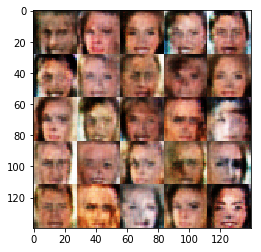

Epoch 1/1... Discriminator Loss: 0.7823... Generator Loss: 1.8670
Epoch 1/1... Discriminator Loss: 0.8294... Generator Loss: 2.2691
Epoch 1/1... Discriminator Loss: 1.1422... Generator Loss: 0.5795
Epoch 1/1... Discriminator Loss: 1.0051... Generator Loss: 0.7739
Epoch 1/1... Discriminator Loss: 0.6300... Generator Loss: 1.4682
Epoch 1/1... Discriminator Loss: 0.9592... Generator Loss: 3.1072
Epoch 1/1... Discriminator Loss: 0.8477... Generator Loss: 1.3509
Epoch 1/1... Discriminator Loss: 0.8707... Generator Loss: 0.8320
Epoch 1/1... Discriminator Loss: 0.7261... Generator Loss: 1.4084
Epoch 1/1... Discriminator Loss: 0.6108... Generator Loss: 1.4635


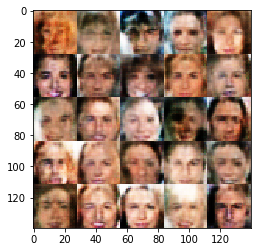

Epoch 1/1... Discriminator Loss: 0.4026... Generator Loss: 1.9338
Epoch 1/1... Discriminator Loss: 0.4849... Generator Loss: 2.4868
Epoch 1/1... Discriminator Loss: 1.4337... Generator Loss: 0.4080
Epoch 1/1... Discriminator Loss: 0.3947... Generator Loss: 2.0797
Epoch 1/1... Discriminator Loss: 0.6337... Generator Loss: 1.1967
Epoch 1/1... Discriminator Loss: 0.6027... Generator Loss: 1.6049
Epoch 1/1... Discriminator Loss: 1.2948... Generator Loss: 0.5173
Epoch 1/1... Discriminator Loss: 0.6013... Generator Loss: 2.1382
Epoch 1/1... Discriminator Loss: 0.5761... Generator Loss: 1.3107
Epoch 1/1... Discriminator Loss: 0.5467... Generator Loss: 1.5044


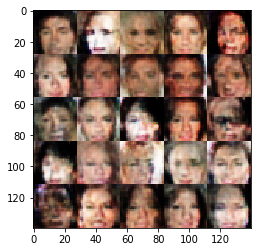

Epoch 1/1... Discriminator Loss: 1.2950... Generator Loss: 0.4366
Epoch 1/1... Discriminator Loss: 0.6139... Generator Loss: 1.1366
Epoch 1/1... Discriminator Loss: 1.2050... Generator Loss: 0.5262
Epoch 1/1... Discriminator Loss: 0.5644... Generator Loss: 3.0116
Epoch 1/1... Discriminator Loss: 0.9257... Generator Loss: 0.7029
Epoch 1/1... Discriminator Loss: 0.5308... Generator Loss: 1.3627
Epoch 1/1... Discriminator Loss: 0.8003... Generator Loss: 0.8195
Epoch 1/1... Discriminator Loss: 1.1417... Generator Loss: 2.5692
Epoch 1/1... Discriminator Loss: 0.6667... Generator Loss: 1.4036
Epoch 1/1... Discriminator Loss: 0.8120... Generator Loss: 1.1989


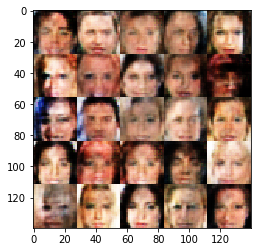

Epoch 1/1... Discriminator Loss: 0.6309... Generator Loss: 1.3755
Epoch 1/1... Discriminator Loss: 0.7533... Generator Loss: 3.4855
Epoch 1/1... Discriminator Loss: 0.6641... Generator Loss: 1.1348
Epoch 1/1... Discriminator Loss: 0.6529... Generator Loss: 1.4697
Epoch 1/1... Discriminator Loss: 0.4366... Generator Loss: 1.8130
Epoch 1/1... Discriminator Loss: 1.1944... Generator Loss: 0.5313
Epoch 1/1... Discriminator Loss: 0.6109... Generator Loss: 1.6896
Epoch 1/1... Discriminator Loss: 0.7466... Generator Loss: 1.6248
Epoch 1/1... Discriminator Loss: 0.7598... Generator Loss: 0.8102
Epoch 1/1... Discriminator Loss: 0.6239... Generator Loss: 2.3447


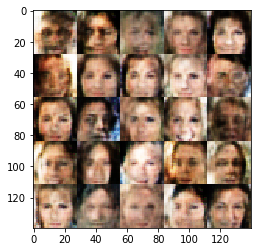

Epoch 1/1... Discriminator Loss: 0.9814... Generator Loss: 0.6488
Epoch 1/1... Discriminator Loss: 1.6278... Generator Loss: 3.1901
Epoch 1/1... Discriminator Loss: 0.7120... Generator Loss: 1.2893
Epoch 1/1... Discriminator Loss: 0.5675... Generator Loss: 2.2524
Epoch 1/1... Discriminator Loss: 0.6686... Generator Loss: 1.4648
Epoch 1/1... Discriminator Loss: 1.3796... Generator Loss: 0.4538
Epoch 1/1... Discriminator Loss: 1.1100... Generator Loss: 0.5398
Epoch 1/1... Discriminator Loss: 1.2973... Generator Loss: 3.0882
Epoch 1/1... Discriminator Loss: 1.0059... Generator Loss: 0.6413
Epoch 1/1... Discriminator Loss: 0.8221... Generator Loss: 0.9420


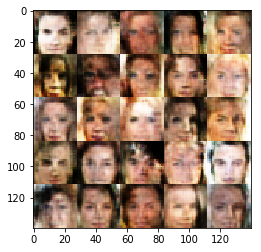

Epoch 1/1... Discriminator Loss: 1.9706... Generator Loss: 0.2244
Epoch 1/1... Discriminator Loss: 1.4367... Generator Loss: 0.4375
Epoch 1/1... Discriminator Loss: 0.5996... Generator Loss: 1.2529
Epoch 1/1... Discriminator Loss: 0.7782... Generator Loss: 0.8943
Epoch 1/1... Discriminator Loss: 0.7941... Generator Loss: 0.9068
Epoch 1/1... Discriminator Loss: 1.1469... Generator Loss: 3.3599
Epoch 1/1... Discriminator Loss: 1.0553... Generator Loss: 0.6132
Epoch 1/1... Discriminator Loss: 0.6478... Generator Loss: 2.3286
Epoch 1/1... Discriminator Loss: 1.8341... Generator Loss: 2.1569
Epoch 1/1... Discriminator Loss: 0.7889... Generator Loss: 0.8772


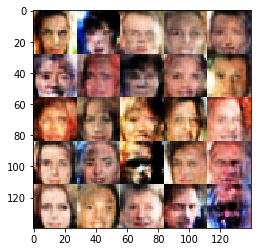

Epoch 1/1... Discriminator Loss: 0.7795... Generator Loss: 2.4823
Epoch 1/1... Discriminator Loss: 0.2939... Generator Loss: 4.0442
Epoch 1/1... Discriminator Loss: 0.4936... Generator Loss: 1.5957
Epoch 1/1... Discriminator Loss: 0.3970... Generator Loss: 3.4955
Epoch 1/1... Discriminator Loss: 0.5092... Generator Loss: 1.6506
Epoch 1/1... Discriminator Loss: 0.9045... Generator Loss: 0.6915
Epoch 1/1... Discriminator Loss: 0.8125... Generator Loss: 0.7338
Epoch 1/1... Discriminator Loss: 0.2859... Generator Loss: 2.1831
Epoch 1/1... Discriminator Loss: 0.7714... Generator Loss: 4.3273
Epoch 1/1... Discriminator Loss: 1.0747... Generator Loss: 0.5629


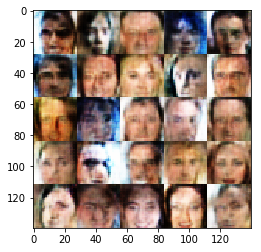

Epoch 1/1... Discriminator Loss: 1.0936... Generator Loss: 0.5944
Epoch 1/1... Discriminator Loss: 0.3359... Generator Loss: 2.6805
Epoch 1/1... Discriminator Loss: 0.9279... Generator Loss: 0.8078
Epoch 1/1... Discriminator Loss: 1.3407... Generator Loss: 2.2710
Epoch 1/1... Discriminator Loss: 1.0051... Generator Loss: 2.2010
Epoch 1/1... Discriminator Loss: 0.8411... Generator Loss: 1.0007
Epoch 1/1... Discriminator Loss: 0.7103... Generator Loss: 1.0610
Epoch 1/1... Discriminator Loss: 0.2985... Generator Loss: 2.7382
Epoch 1/1... Discriminator Loss: 0.5011... Generator Loss: 1.8062
Epoch 1/1... Discriminator Loss: 0.3438... Generator Loss: 1.9811


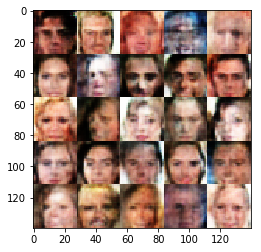

Epoch 1/1... Discriminator Loss: 0.3814... Generator Loss: 2.4418
Epoch 1/1... Discriminator Loss: 0.8456... Generator Loss: 0.9609
Epoch 1/1... Discriminator Loss: 0.8098... Generator Loss: 0.8239
Epoch 1/1... Discriminator Loss: 0.5909... Generator Loss: 1.3956
Epoch 1/1... Discriminator Loss: 0.5391... Generator Loss: 3.7412
Epoch 1/1... Discriminator Loss: 0.5774... Generator Loss: 3.4754
Epoch 1/1... Discriminator Loss: 0.5330... Generator Loss: 1.3883
Epoch 1/1... Discriminator Loss: 0.2285... Generator Loss: 2.2463
Epoch 1/1... Discriminator Loss: 0.2740... Generator Loss: 1.8298
Epoch 1/1... Discriminator Loss: 0.5472... Generator Loss: 1.8318


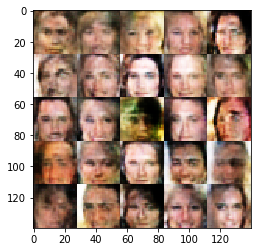

Epoch 1/1... Discriminator Loss: 0.1886... Generator Loss: 2.3671
Epoch 1/1... Discriminator Loss: 0.5611... Generator Loss: 1.2907
Epoch 1/1... Discriminator Loss: 0.2042... Generator Loss: 2.9156
Epoch 1/1... Discriminator Loss: 1.3348... Generator Loss: 1.8444
Epoch 1/1... Discriminator Loss: 1.0436... Generator Loss: 2.5804
Epoch 1/1... Discriminator Loss: 0.7156... Generator Loss: 1.9003
Epoch 1/1... Discriminator Loss: 1.4257... Generator Loss: 0.5371
Epoch 1/1... Discriminator Loss: 0.7052... Generator Loss: 1.1436
Epoch 1/1... Discriminator Loss: 0.3207... Generator Loss: 1.8818
Epoch 1/1... Discriminator Loss: 1.8993... Generator Loss: 0.3024


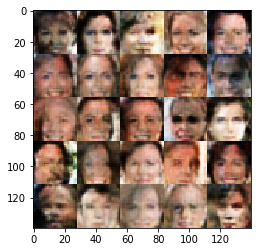

Epoch 1/1... Discriminator Loss: 0.2689... Generator Loss: 2.2544
Epoch 1/1... Discriminator Loss: 0.4575... Generator Loss: 1.5277
Epoch 1/1... Discriminator Loss: 0.8692... Generator Loss: 2.0139
Epoch 1/1... Discriminator Loss: 0.7723... Generator Loss: 3.0790
Epoch 1/1... Discriminator Loss: 0.8533... Generator Loss: 1.0035
Epoch 1/1... Discriminator Loss: 0.6962... Generator Loss: 1.7964
Epoch 1/1... Discriminator Loss: 0.9342... Generator Loss: 2.6225
Epoch 1/1... Discriminator Loss: 1.0368... Generator Loss: 0.7466
Epoch 1/1... Discriminator Loss: 0.2942... Generator Loss: 2.4369
Epoch 1/1... Discriminator Loss: 1.1404... Generator Loss: 0.5667


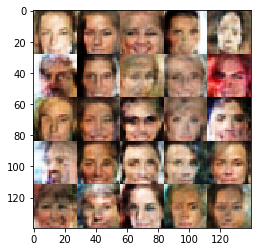

Epoch 1/1... Discriminator Loss: 0.6624... Generator Loss: 1.9320
Epoch 1/1... Discriminator Loss: 0.5537... Generator Loss: 1.8794
Epoch 1/1... Discriminator Loss: 1.0450... Generator Loss: 0.7575
Epoch 1/1... Discriminator Loss: 0.9665... Generator Loss: 0.7604
Epoch 1/1... Discriminator Loss: 0.9380... Generator Loss: 0.7929
Epoch 1/1... Discriminator Loss: 0.7789... Generator Loss: 1.0519
Epoch 1/1... Discriminator Loss: 0.4243... Generator Loss: 2.7205
Epoch 1/1... Discriminator Loss: 0.6296... Generator Loss: 1.1607
Epoch 1/1... Discriminator Loss: 1.1115... Generator Loss: 2.3613
Epoch 1/1... Discriminator Loss: 0.7529... Generator Loss: 1.4361


In [ ]:
batch_size =64
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.